## `CIAFR10` Image Classification Challenge (Version 0.3.1) Dataset Exploration

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as tf_hub

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import glob
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil
import urllib3

In [0]:
logger = tf.get_logger()

In [0]:
logger.setLevel(logging.ERROR)
style.use('ggplot')
tfds.disable_progress_bar()
urllib3.disable_warnings(category=urllib3.exceptions.InsecureRequestWarning)

In [0]:
_URL = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

fname = _URL.split('/')[-1]
fname

'cifar-10-python.tar.gz'

In [0]:
zip_file_here = tf.keras.utils.get_file(fname=fname, origin=_URL, extract=True)

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
zip_file_here

'/root/.keras/datasets/cifar-10-python.tar.gz'

In [0]:
path_ = os.path.dirname(zip_file_here)
print(path_)

!ls $path_

/root/.keras/datasets
cifar-10-batches-py  cifar-10-python.tar.gz


In [0]:
cifar10_py_dir = 'cifar-10-batches-py'

base_dir = os.path.join(os.path.dirname(zip_file_here), cifar10_py_dir)
base_dir

'/root/.keras/datasets/cifar-10-batches-py'

In [0]:
!ls $base_dir

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [0]:
!find $base_dir -type f -print

/root/.keras/datasets/cifar-10-batches-py/data_batch_5
/root/.keras/datasets/cifar-10-batches-py/data_batch_1
/root/.keras/datasets/cifar-10-batches-py/batches.meta
/root/.keras/datasets/cifar-10-batches-py/readme.html
/root/.keras/datasets/cifar-10-batches-py/data_batch_3
/root/.keras/datasets/cifar-10-batches-py/data_batch_2
/root/.keras/datasets/cifar-10-batches-py/test_batch
/root/.keras/datasets/cifar-10-batches-py/data_batch_4


In [0]:
base_dir_pickle_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']

In [0]:
def unpickling(filename):
  import pickle
  with open(file=filename, mode='rb') as fo:
    dict_ = pickle.load(fo, encoding='bytes')
  return dict_

In [0]:
batch_dict_1 = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[0]))
print(batch_dict_1[b'data'].shape)
print(len(batch_dict_1[b'filenames']), len(batch_dict_1[b'labels']))

(10000, 3072)
10000 10000


In [0]:
batch_dict_2 = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[1]))
print(batch_dict_2[b'data'].shape)
print(len(batch_dict_2[b'filenames']), len(batch_dict_2[b'labels']))

(10000, 3072)
10000 10000


In [0]:
batch_dict_3 = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[2]))
print(batch_dict_3[b'data'].shape)
print(len(batch_dict_3[b'filenames']), len(batch_dict_3[b'labels']))

(10000, 3072)
10000 10000


In [0]:
batch_dict_4 = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[3]))
print(batch_dict_4[b'data'].shape)
print(len(batch_dict_4[b'filenames']), len(batch_dict_4[b'labels']))

(10000, 3072)
10000 10000


In [0]:
batch_dict_5 = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[4]))
print(batch_dict_5[b'data'].shape)
print(len(batch_dict_5[b'filenames']), len(batch_dict_5[b'labels']))

(10000, 3072)
10000 10000


In [0]:
test_dict = unpickling(filename=os.path.join(base_dir, base_dir_pickle_files[5]))
print(test_dict[b'data'].shape)
print(len(test_dict[b'filenames']), len(test_dict[b'labels']))

(10000, 3072)
10000 10000


In [0]:
print(batch_dict_1[b'data'])

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]


In [0]:
first_image = batch_dict_1[b'data'][1]
first_image

array([154, 126, 105, ..., 139, 142, 144], dtype=uint8)

In [0]:
first_label = batch_dict_1[b'labels'][1]
first_label

9

In [0]:
first_image_r = first_image[:(32**2)]
first_image_g = first_image[(32**2):((32**2)*2)]
first_image_b = first_image[((32**2)*2):]

In [0]:
print(first_image_r, len(first_image_r))
print(first_image_g, len(first_image_g))
print(first_image_b, len(first_image_b))

[154 126 105 ... 143 143 143] 1024
[177 137 104 ... 133 134 133] 1024
[187 136  95 ... 139 142 144] 1024


In [0]:
image_reshaped = np.array([], dtype=np.int32)
for i in range(len(first_image)//3):
  image_reshaped = np.append(arr=image_reshaped, values=[first_image_r[i], first_image_g[i], first_image_b[i]])

image_reshaped

array([154, 177, 187, ..., 143, 133, 144], dtype=int32)

In [0]:
image_reshaped = image_reshaped.reshape((32, 32, 3))
image_reshaped

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

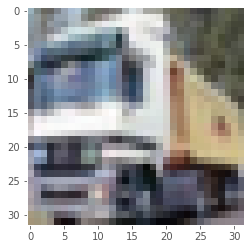

In [0]:
plt.imshow(image_reshaped)
plt.grid(False)
plt.show()